In [1]:
# Libraries for working with data
import numpy as np 
import pandas as pd

# libraries for visualizing data
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#########################################################
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [2]:
#Loading dataset
train = pd.read_csv('../input/tabular-playground-series-jan-2022/train.csv')
test = pd.read_csv('../input/tabular-playground-series-jan-2022/test.csv')
submission = pd.read_csv('../input/tabular-playground-series-jan-2022/sample_submission.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   date      26298 non-null  object
 2   country   26298 non-null  object
 3   store     26298 non-null  object
 4   product   26298 non-null  object
 5   num_sold  26298 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


In [4]:
train.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [5]:
# converting date into time series data
train['date'] = pd.to_datetime(train.date)
test['date'] = pd.to_datetime(test.date)

In [6]:
# duration 
print(f'Training data is from {train.date.min()} to {train.date.max()} duration {train.date.max()-train.date.min()} ')
print(f'Testing  data is from {test.date.min()} to {test.date.max()} duration  {test.date.max()-test.date.min()} ')

Training data is from 2015-01-01 00:00:00 to 2018-12-31 00:00:00 duration 1460 days 00:00:00 
Testing  data is from 2019-01-01 00:00:00 to 2019-12-31 00:00:00 duration  364 days 00:00:00 


In [7]:
for col in ['country', 'store','product']:
    print(f'{col}: {train[col].unique()}')


country: ['Finland' 'Norway' 'Sweden']
store: ['KaggleMart' 'KaggleRama']
product: ['Kaggle Mug' 'Kaggle Hat' 'Kaggle Sticker']


In [8]:
train_categories = train.groupby(['country','store','product']).agg({'num_sold': 'sum'})
train_categories

num_sold
country store      product                 
Finland KaggleMart Kaggle Hat        529583
                   Kaggle Mug        298337
                   Kaggle Sticker    150548
        KaggleRama Kaggle Hat        918862
                   Kaggle Mug        520278
                   Kaggle Sticker    263319
Norway  KaggleMart Kaggle Hat        868777
                   Kaggle Mug        488515
                   Kaggle Sticker    247753
        KaggleRama Kaggle Hat       1514119
                   Kaggle Mug        853659
                   Kaggle Sticker    431883
Sweden  KaggleMart Kaggle Hat        612472
                   Kaggle Mug        344628
                   Kaggle Sticker    174755
        KaggleRama Kaggle Hat       1068652
                   Kaggle Mug        600870
                   Kaggle Sticker    304348

In [9]:
train_data_year = train.pivot_table(index=pd.Grouper(freq='Y',key='date')).reset_index().drop(columns='row_id',axis=0)
train_data_year.head()

,date,num_sold
0,2015-12-31,364.382192
1,2016-12-31,364.807529
2,2017-12-31,396.011720
3,2018-12-31,424.995129


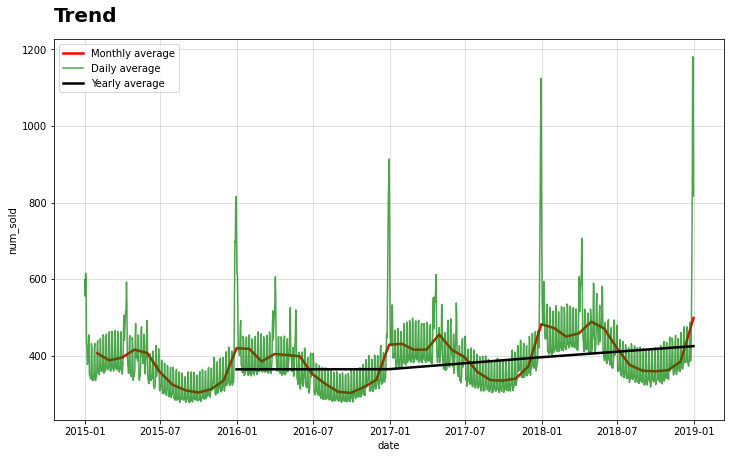

In [10]:
#using seaborn
train_data_year = train.set_index('date').groupby([pd.Grouper(freq='Y')])['num_sold'].mean().reset_index()
train_data_month = train.set_index('date').groupby([pd.Grouper(freq='M')])['num_sold'].mean().reset_index()
train_data_day = train.set_index('date').groupby([pd.Grouper(freq='d')])['num_sold'].mean().reset_index()
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.lineplot(data=train_data_month,x='date',y='num_sold' ,label='Monthly average', color='red',linewidth=2.5)
sns.lineplot(data=train_data_day,x='date',y='num_sold' ,label='Daily average', color='green',alpha=.7)
sns.lineplot(data=train_data_year,x='date',y='num_sold',ax=ax, label='Yearly average', color='black',linewidth=2.5)
ax.set_title('Trend', fontsize=20, fontweight='bold', loc='left', y=1.03)
ax.grid(alpha=0.5)
ax.legend()
plt.show()



In [11]:
#using plotly
train_data_month = train.set_index('date').groupby([pd.Grouper(freq='7d')])['num_sold'].mean().reset_index()
a = px.line(data_frame=train_data_month,x='date',y='num_sold')
a.show()

## Preprocessing and visualization 

In [12]:
country_daily = train.groupby(['date','country'])['num_sold'].sum().reset_index(level=[0,1])
for country in train['country'].unique():
    display(country_daily[country_daily['country']==country].sort_values(by=['num_sold'], ascending=False).head())

,date,country,num_sold
4374,2018-12-29,Finland,6029
4377,2018-12-30,Finland,5869
3282,2017-12-30,Finland,5611
3285,2017-12-31,Finland,4683
3279,2017-12-29,Finland,4650


,date,country,num_sold
4378,2018-12-30,Norway,8980
4375,2018-12-29,Norway,8855
3283,2017-12-30,Norway,8388
3286,2017-12-31,Norway,7433
3280,2017-12-29,Norway,7018


,date,country,num_sold
4376,2018-12-29,Sweden,6377
3284,2017-12-30,Sweden,6248
4379,2018-12-30,Sweden,6227
3287,2017-12-31,Sweden,5488
3281,2017-12-29,Sweden,5205


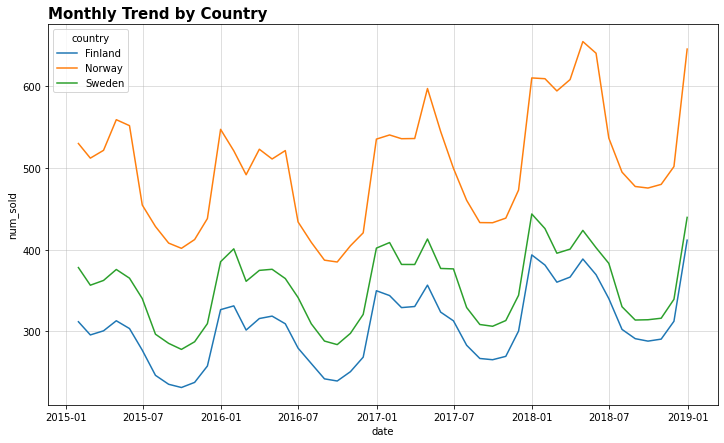

In [13]:
#using seaborn
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
train_monthly_country = train.set_index('date').groupby([pd.Grouper(freq='M'),'country'])[['num_sold']].mean()
sns.lineplot(x="date", y='num_sold', hue='country', data=train_monthly_country, ax=ax)

ax.set_ylabel('num_sold')
ax.set_title('Monthly Trend by Country', fontsize=15, fontweight='bold', loc='left')
ax.grid(alpha=0.5)
plt.show()

In [14]:
train_monthly_country = train.set_index('date').groupby([pd.Grouper(freq='M'),'country'])[['num_sold']].mean().reset_index()
train_monthly_country.head()

,date,country,num_sold
0,2015-01-31,Finland,311.817204
1,2015-01-31,Norway,529.779570
2,2015-01-31,Sweden,378.064516
3,2015-02-28,Finland,295.702381
4,2015-02-28,Norway,511.892857


In [15]:
#using plotly
train_monthly_country = train.set_index('date').groupby([pd.Grouper(freq='M'),'country'])[['num_sold']].mean().reset_index()
a = px.line(data_frame=train_monthly_country,x='date',y='num_sold',color='country')
a.show()

## Distrubution of product sales on weekends and weekdays

In [16]:
train['dayofweek'] = train['date'].dt.dayofweek
test['dayofweek'] = test['date'].dt.dayofweek

In [17]:
train_dayofweek = train.set_index('date').groupby([pd.Grouper(freq='M'),'dayofweek'])[['num_sold']].mean().reset_index()
a = px.line(data_frame=train_dayofweek,x='date',y='num_sold',color='dayofweek')
a.show()

In [18]:
# and digging deeper
train['weekend'] = train['dayofweek'].apply(lambda x: x >= 4)
train_weekend = train.set_index('date').groupby([pd.Grouper(freq='M'),'weekend'])[['num_sold']].mean().reset_index()
a = px.line(data_frame=train_weekend,x='date',y='num_sold',color='weekend',title='weekday vs weekend trend comparasion')
a.show()

In [19]:
train.head()

,row_id,date,country,store,product,num_sold,dayofweek,weekend
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,3,False
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,3,False
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,3,False
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,3,False
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,3,False


In [20]:
country_dayofweek = pd.pivot_table(train,index='country',columns='dayofweek',values='num_sold',aggfunc=np.mean)
country_dayofweek = pd.DataFrame(country_dayofweek.divide(country_dayofweek.sum(axis=1),axis=0).unstack()).reset_index()
country_dayofweek.rename(columns={0:'num_sold'},inplace=True)
country_dayofweek.head()

,dayofweek,country,num_sold
0,0,Finland,0.131726
1,0,Norway,0.132270
2,0,Sweden,0.131658
3,1,Finland,0.131869
4,1,Norway,0.131490


In [21]:
a = px.bar(data_frame=country_dayofweek,x='dayofweek',y='num_sold',color='country',title='percent of day by week of country')
a.update_layout(barmode='group',
        xaxis = dict(
        tickmode = 'array',
        tickvals = [0,1,2,3,4,5,6],
        ticktext = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
    )
               )
a.show()